# Notebook Imports

In [1]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import statsmodels.api as sm

%matplotlib inline

# Gather Data

[Original research paper here](http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.926.5532&rep=rep1&type=pdf)

In [2]:
boston_dataset = load_boston()

In [3]:
type(boston_dataset) #convert to a dataframe later

sklearn.utils.Bunch

In [4]:
boston_dataset

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

### Things to keep in mind: 

Whats the source of the data?

Brief description of said data

Number of datapoints (small ammount of data vs large sample size)

number of features (varibles or characteristics of data, size, age, condition etc)

Names of features

Description of features

In [5]:
dir(boston_dataset) #list of attributes for the object

['DESCR', 'data', 'feature_names', 'filename', 'target']

In [6]:
print(boston_dataset.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

### Things to keep in mind: 

Whats the source of the data? - [Original research paper here](http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.926.5532&rep=rep1&type=pdf)


Brief description of said data - Listed above.

Number of datapoints (small ammount of data vs large sample size) -506

number of features (varibles or characteristics of data, size, age, condition etc) - 13

Names of features - Listed above.

Description of features - Listed above.

### Data points  and features

In [7]:
type(boston_dataset.data)

numpy.ndarray

In [8]:
boston_dataset.data.shape #in order of rows and columns

(506, 13)

In [9]:
boston_dataset.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [10]:
#this is the house prices.(in thousands)
# Data was grabbed in the late 70s so inflation calculation might be need.
boston_dataset.target 

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

## Data exploration with Pandas dataframes. 

In [11]:
#create a pandas dataframe
data = pd.DataFrame(data = boston_dataset.data, columns = boston_dataset.feature_names)

# add a column with the price (target )
data['PRICE'] = boston_dataset.target 

In [12]:
data.head(11) #top rows (gives 5 if no arg)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10,18.9


In [13]:
data.tail(11) #bottom rows (gives 5 if no arg)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
495,0.17899,0.0,9.69,0.0,0.585,5.670,28.8,2.7986,6.0,391.0,19.2,393.29,17.60,23.1
496,0.28960,0.0,9.69,0.0,0.585,5.390,72.9,2.7986,6.0,391.0,19.2,396.90,21.14,19.7
497,0.26838,0.0,9.69,0.0,0.585,5.794,70.6,2.8927,6.0,391.0,19.2,396.90,14.10,18.3
498,0.23912,0.0,9.69,0.0,0.585,6.019,65.3,2.4091,6.0,391.0,19.2,396.90,12.92,21.2
499,0.17783,0.0,9.69,0.0,0.585,5.569,73.5,2.3999,6.0,391.0,19.2,395.77,15.10,17.5
500,0.22438,0.0,9.69,0.0,0.585,6.027,79.7,2.4982,6.0,391.0,19.2,396.90,14.33,16.8
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [14]:
data.count() #shows num of rows total for each column

CRIM       506
ZN         506
INDUS      506
CHAS       506
NOX        506
RM         506
AGE        506
DIS        506
RAD        506
TAX        506
PTRATIO    506
B          506
LSTAT      506
PRICE      506
dtype: int64

#### Tip: Instances can mean number of rows/datapoints

## Cleaning Data - Check for missing vlaues 

In [15]:
pd.isnull(data).any()

CRIM       False
ZN         False
INDUS      False
CHAS       False
NOX        False
RM         False
AGE        False
DIS        False
RAD        False
TAX        False
PTRATIO    False
B          False
LSTAT      False
PRICE      False
dtype: bool

In [16]:
data.info() #does the same thing without  pandas

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
PRICE      506 non-null float64
dtypes: float64(14)
memory usage: 55.4 KB


## Visualizing Data - Histograms, Distributions and Bar Charts.

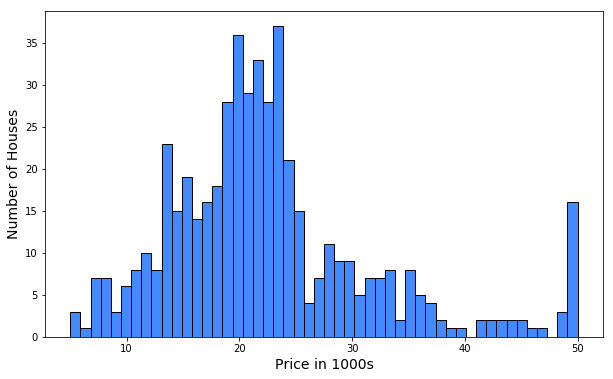

In [17]:
plt.figure(figsize=(10,6))
plt.hist(data['PRICE'], bins =50, ec='black', color='#448aff')
plt.xlabel('Price in 1000s', fontsize =14)
plt.ylabel('Number of Houses', fontsize =14)
plt.show()

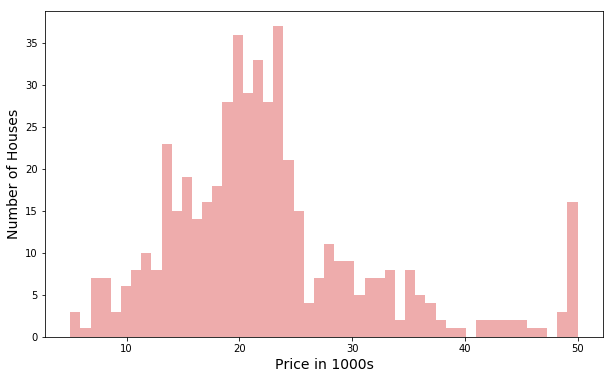

In [18]:
plt.figure(figsize=(10,6))
sns.distplot(data['PRICE'], bins=50, hist = True, kde= False, color= '#d63031')
plt.xlabel('Price in 1000s', fontsize =14)
plt.ylabel('Number of Houses', fontsize =14)
plt.show()
#line bellow is Probability Density Function (PDF...yes PDF) 
# estiates distribution of data. 

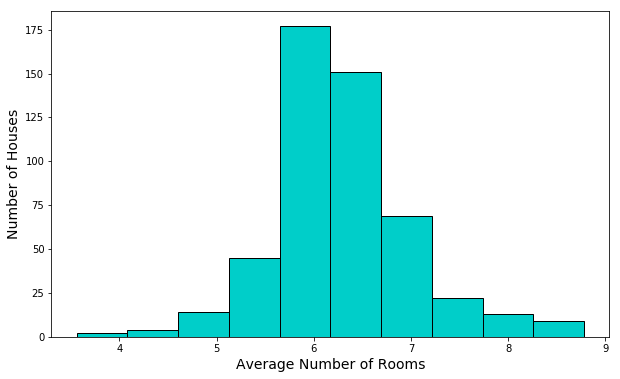

In [19]:
plt.figure(figsize=(10,6))
plt.hist(data['RM'], ec='black', color= '#00cec9')
plt.xlabel('Average Number of Rooms', fontsize =14)
plt.ylabel('Number of Houses', fontsize =14)
plt.show()
#line bellow is Probability Density Function (PDF...yes PDF) 
# estiates distribution of data. 

In [20]:
data['RM'].mean()

6.284634387351787

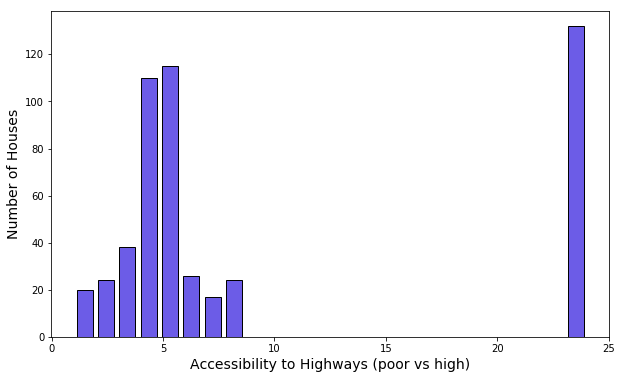

In [21]:
plt.figure(figsize=(10,6))
plt.hist(data['RAD'], bins=24, ec='black', rwidth=0.75, color = '#6c5ce7')
plt.xlabel('Accessibility to Highways (poor vs high)', fontsize =14)
plt.ylabel('Number of Houses', fontsize=14)
plt.show()

#### NOTE - Histograms are not the best representation for given data. Must make a bar graph.

In [22]:
data['RAD'].value_counts()

24.0    132
5.0     115
4.0     110
3.0      38
6.0      26
8.0      24
2.0      24
1.0      20
7.0      17
Name: RAD, dtype: int64

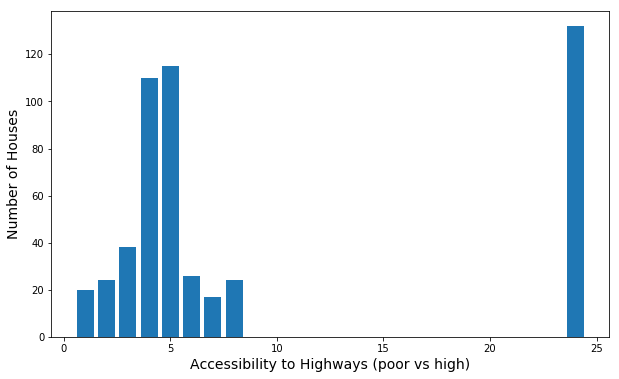

In [23]:
frequency = data['RAD'].value_counts()
##type(frequency)
##frequency.index
#frequency.axes[0] also gives us the row axes labels
plt.figure(figsize=(10,6))
plt.xlabel('Accessibility to Highways (poor vs high)', fontsize =14)
plt.ylabel('Number of Houses', fontsize=14)
plt.bar(frequency.index, height=frequency)
plt.show()

data['CHAS'].value_counts()

## Descriptive Statistics

In [24]:
data['PRICE'].min()

5.0

In [25]:
data['PRICE'].max()

50.0

In [26]:
data.min()

CRIM         0.00632
ZN           0.00000
INDUS        0.46000
CHAS         0.00000
NOX          0.38500
RM           3.56100
AGE          2.90000
DIS          1.12960
RAD          1.00000
TAX        187.00000
PTRATIO     12.60000
B            0.32000
LSTAT        1.73000
PRICE        5.00000
dtype: float64

In [27]:
data.max()

CRIM        88.9762
ZN         100.0000
INDUS       27.7400
CHAS         1.0000
NOX          0.8710
RM           8.7800
AGE        100.0000
DIS         12.1265
RAD         24.0000
TAX        711.0000
PTRATIO     22.0000
B          396.9000
LSTAT       37.9700
PRICE       50.0000
dtype: float64

In [28]:
data.mean()

CRIM         3.613524
ZN          11.363636
INDUS       11.136779
CHAS         0.069170
NOX          0.554695
RM           6.284634
AGE         68.574901
DIS          3.795043
RAD          9.549407
TAX        408.237154
PTRATIO     18.455534
B          356.674032
LSTAT       12.653063
PRICE       22.532806
dtype: float64

In [29]:
data.median()

CRIM         0.25651
ZN           0.00000
INDUS        9.69000
CHAS         0.00000
NOX          0.53800
RM           6.20850
AGE         77.50000
DIS          3.20745
RAD          5.00000
TAX        330.00000
PTRATIO     19.05000
B          391.44000
LSTAT       11.36000
PRICE       21.20000
dtype: float64

In [30]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


## Correlation 

## $$ \rho_{XY} = corr(X,Y)$$
## $$ -1.0 \leq \rho_{XY} \leq +1.0$$

In [31]:
data['PRICE'].corr(data['RM']) # correnation of price and number of rooms in house

0.695359947071539

In [32]:
data['PRICE'].corr(data['PTRATIO']) # correnation of price and people : teachers ratio

-0.5077866855375615

In [33]:
data.corr() # Pearson Correlation Coefficients

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [34]:
mask = np.zeros_like(data.corr())
triangle_indices = np.triu_indices_from(mask)
mask[triangle_indices] = True
mask

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

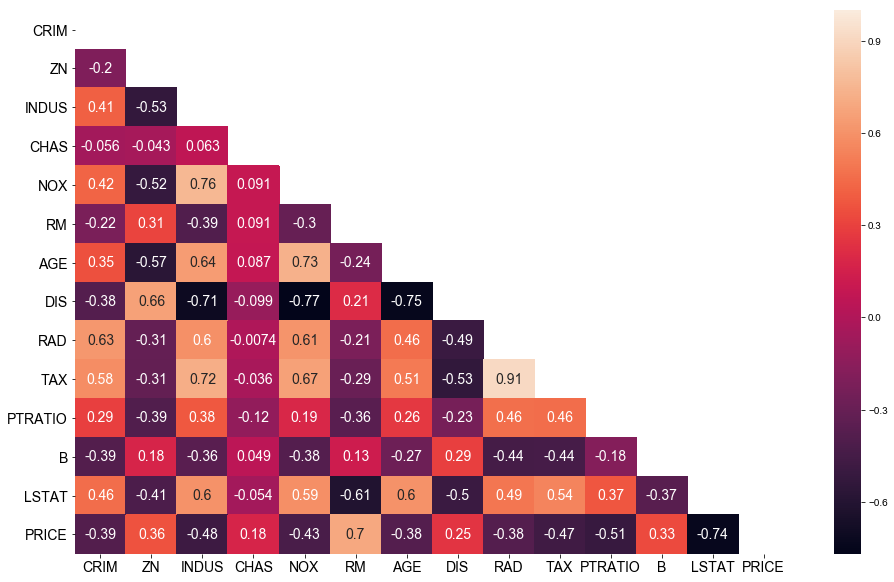

In [35]:
plt.figure(figsize=(16,10))
sns.heatmap(data.corr(), mask = mask, annot= True, annot_kws={"size": 14})
sns.set_style('white')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

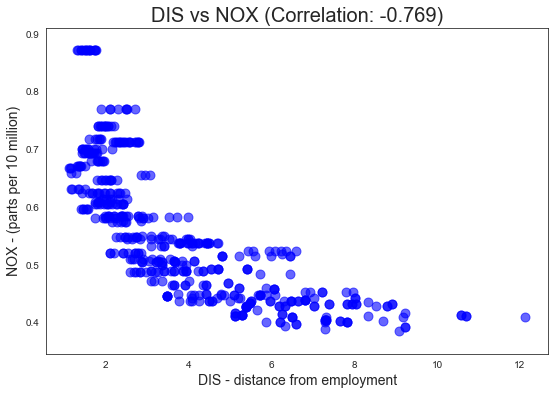

In [36]:
nox_dis_cor = round(data['NOX'].corr(data['DIS']),3)

plt.figure(figsize=(9,6))
plt.scatter(data['DIS'], data['NOX'], color ='blue', s=80, alpha =0.6)
plt.title(f'DIS vs NOX (Correlation: {nox_dis_cor})', fontsize=20)
plt.xlabel('DIS - distance from employment', fontsize=14)
plt.ylabel('NOX - (parts per 10 million)', fontsize=14)
plt.show()


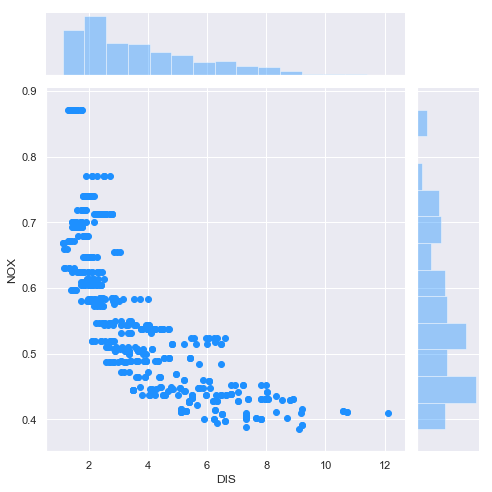

In [37]:
sns.set()
sns.set_context('notebook')
sns.set_style('darkgrid')
sns.jointplot(x=data['DIS'], y=data['NOX'] ,height=7, color='dodgerblue')
plt.show()

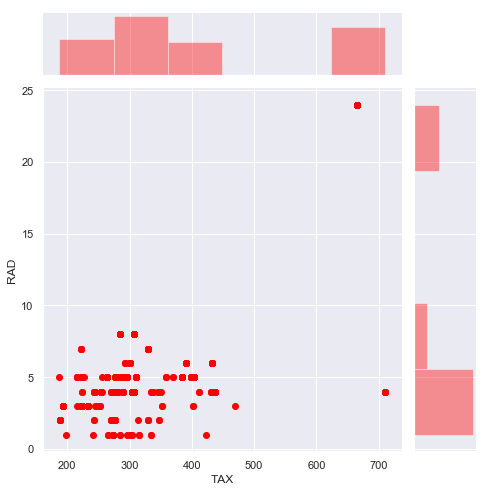

In [38]:
sns.set()
sns.set_context('notebook')
sns.set_style('darkgrid')
sns.jointplot(x=data['TAX'], y=data['RAD'] ,height=7, color='red')
plt.show()

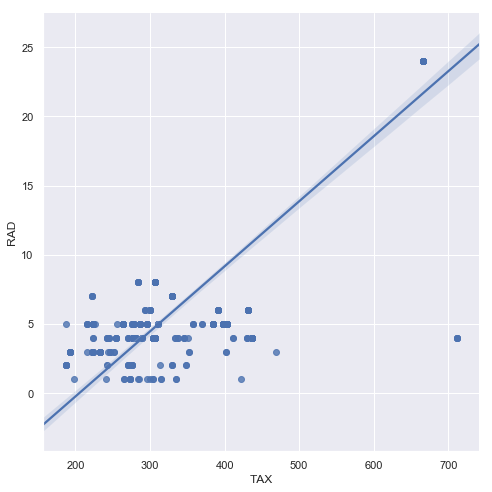

In [39]:
sns.lmplot(x='TAX',y='RAD', data=data, height=7)


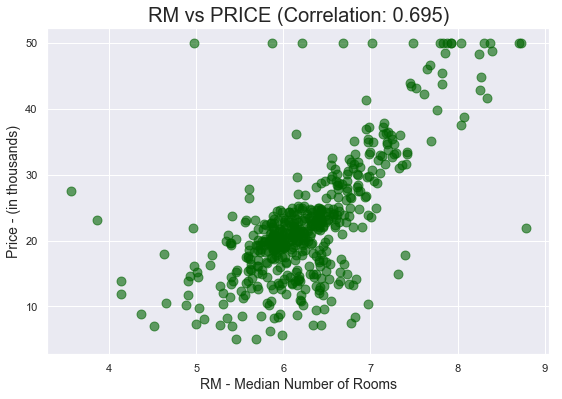

In [40]:
rm_tgt_cor = round(data['RM'].corr(data['PRICE']),3)

plt.figure(figsize=(9,6))
plt.scatter(data['RM'], data['PRICE'], color ='darkgreen', s=80, alpha =0.6)
plt.title(f'RM vs PRICE (Correlation: {rm_tgt_cor})', fontsize=20)
plt.xlabel('RM - Median Number of Rooms', fontsize=14)
plt.ylabel('Price - (in thousands)', fontsize=14)
plt.show()


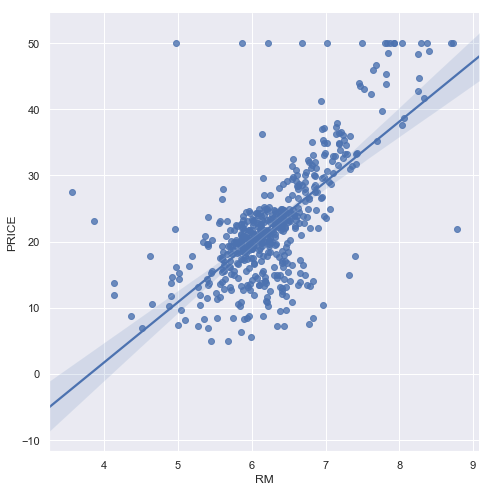

In [41]:
sns.lmplot(x='RM',y='PRICE', data=data, height=7)
plt.show()

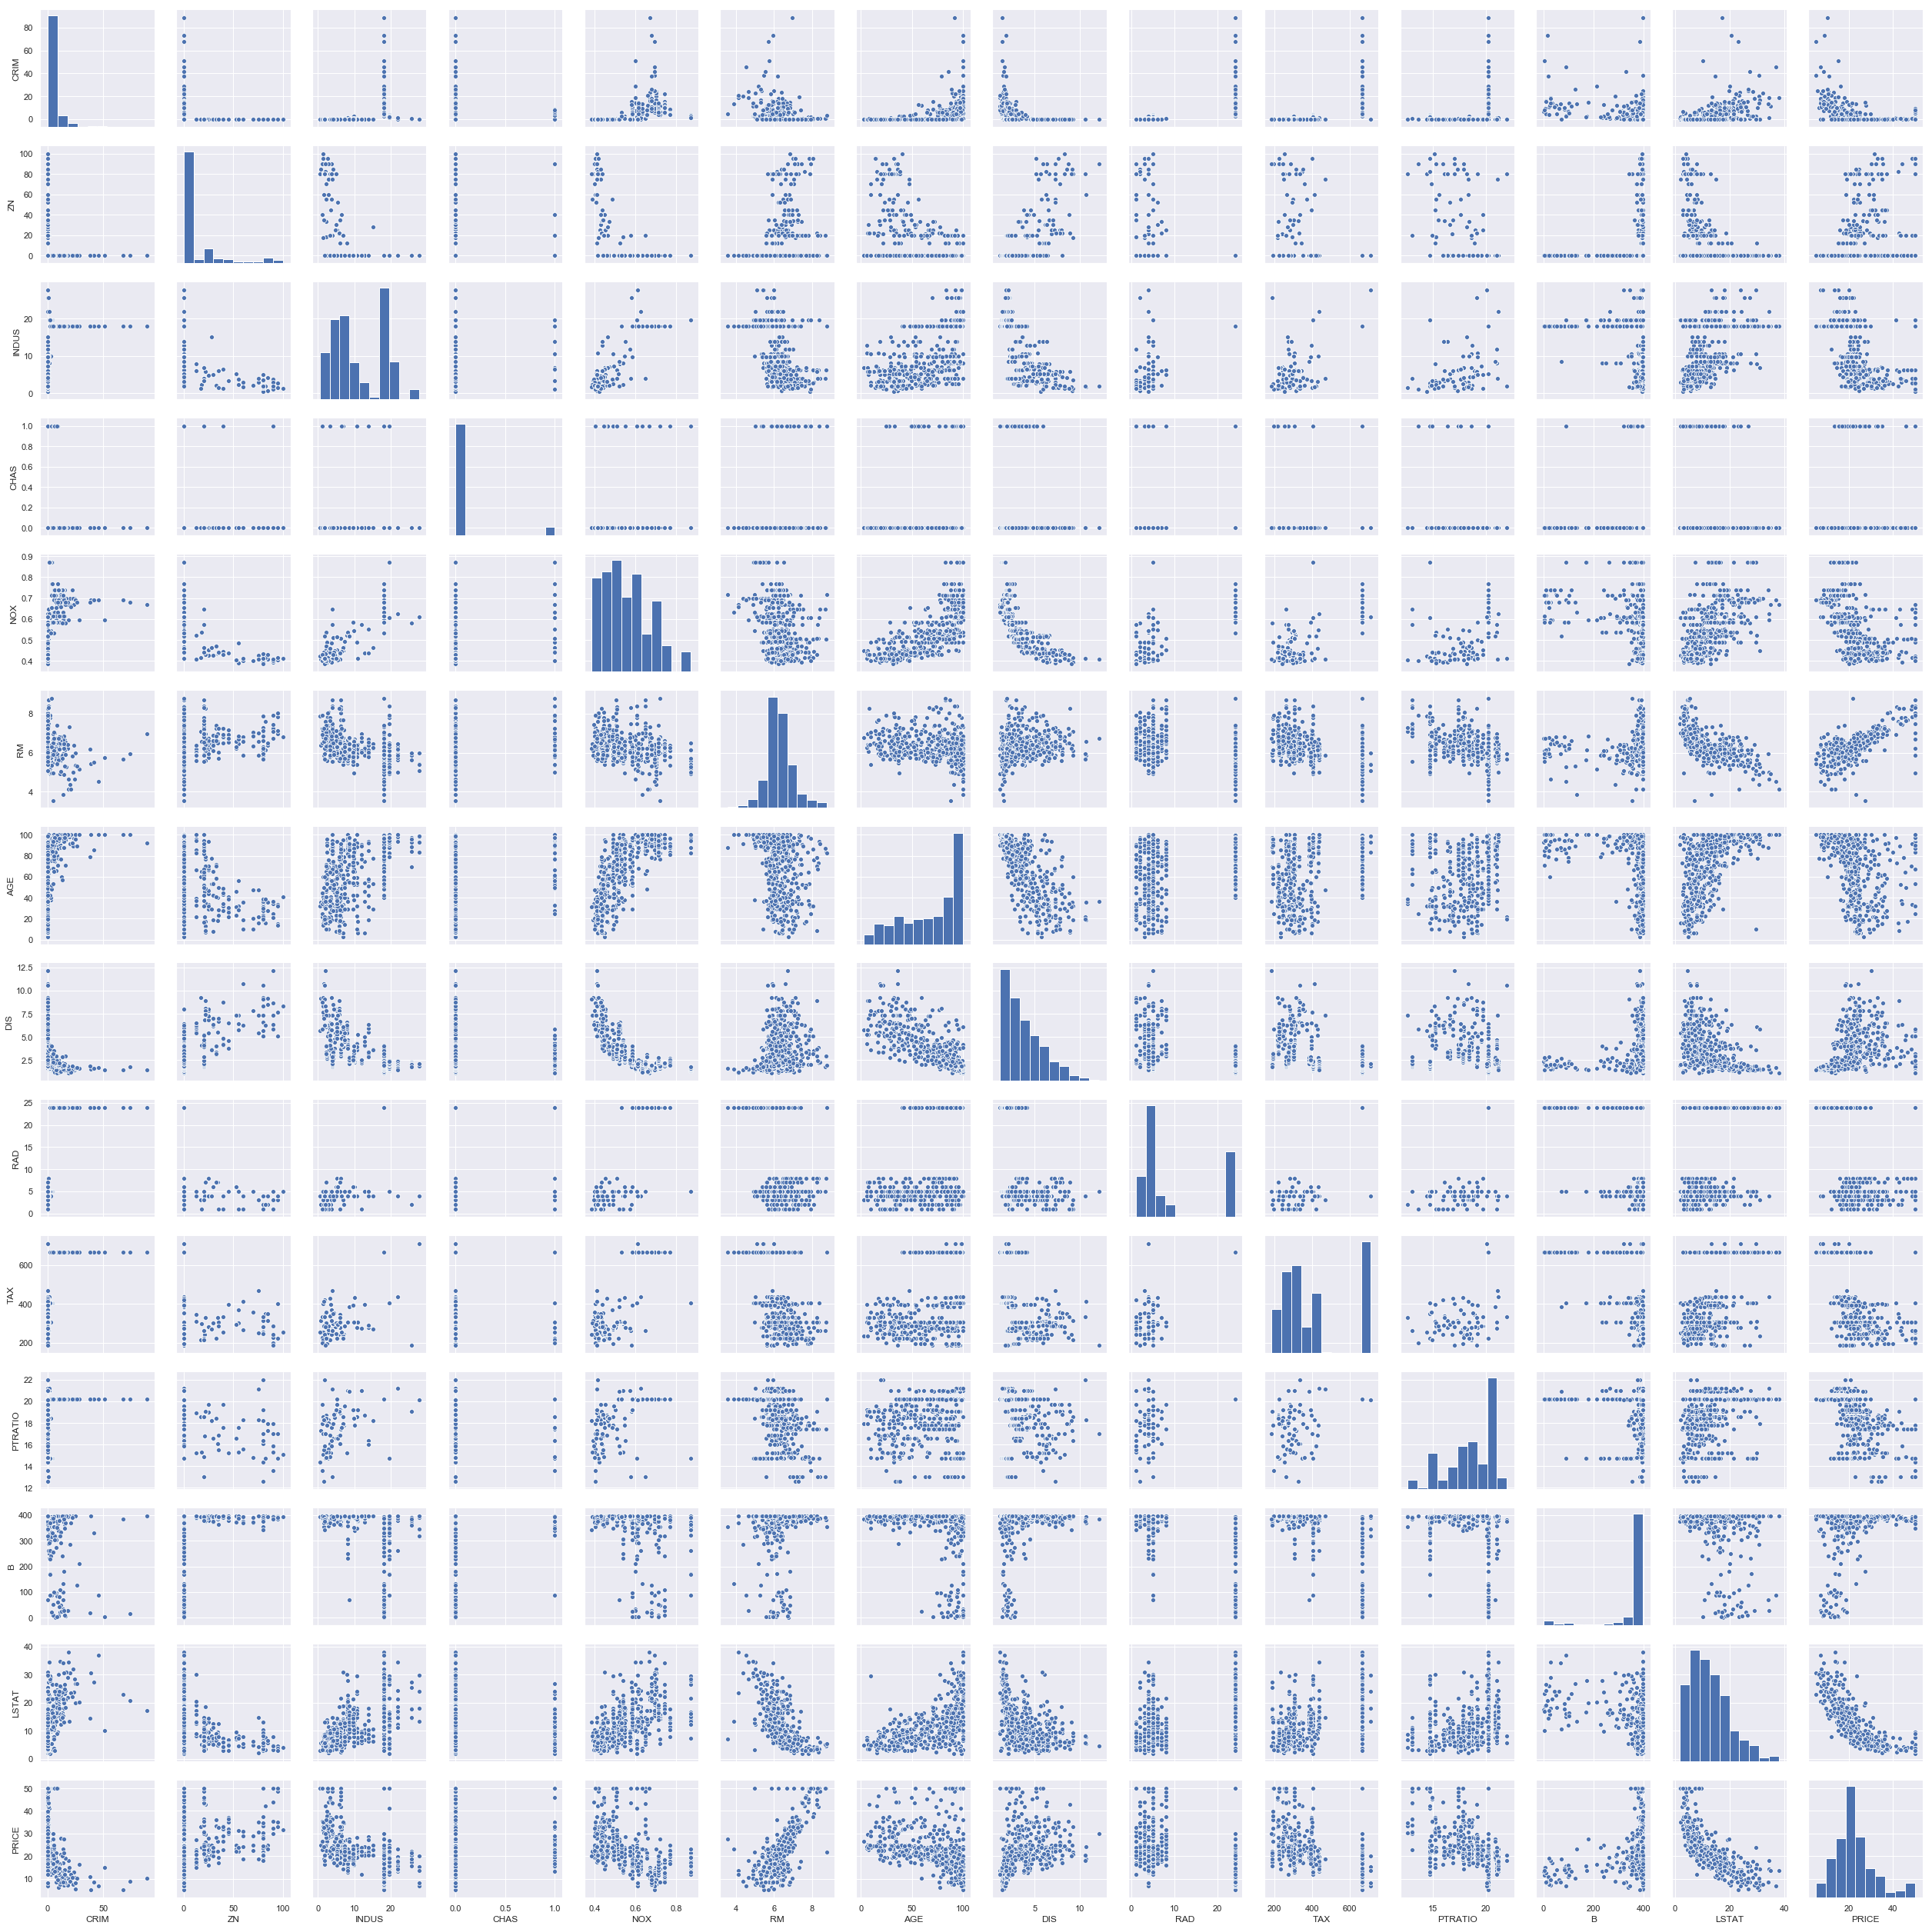

Wall time: 17 s


In [42]:
%%time
# all pairs
sns.pairplot(data)
plt.show()

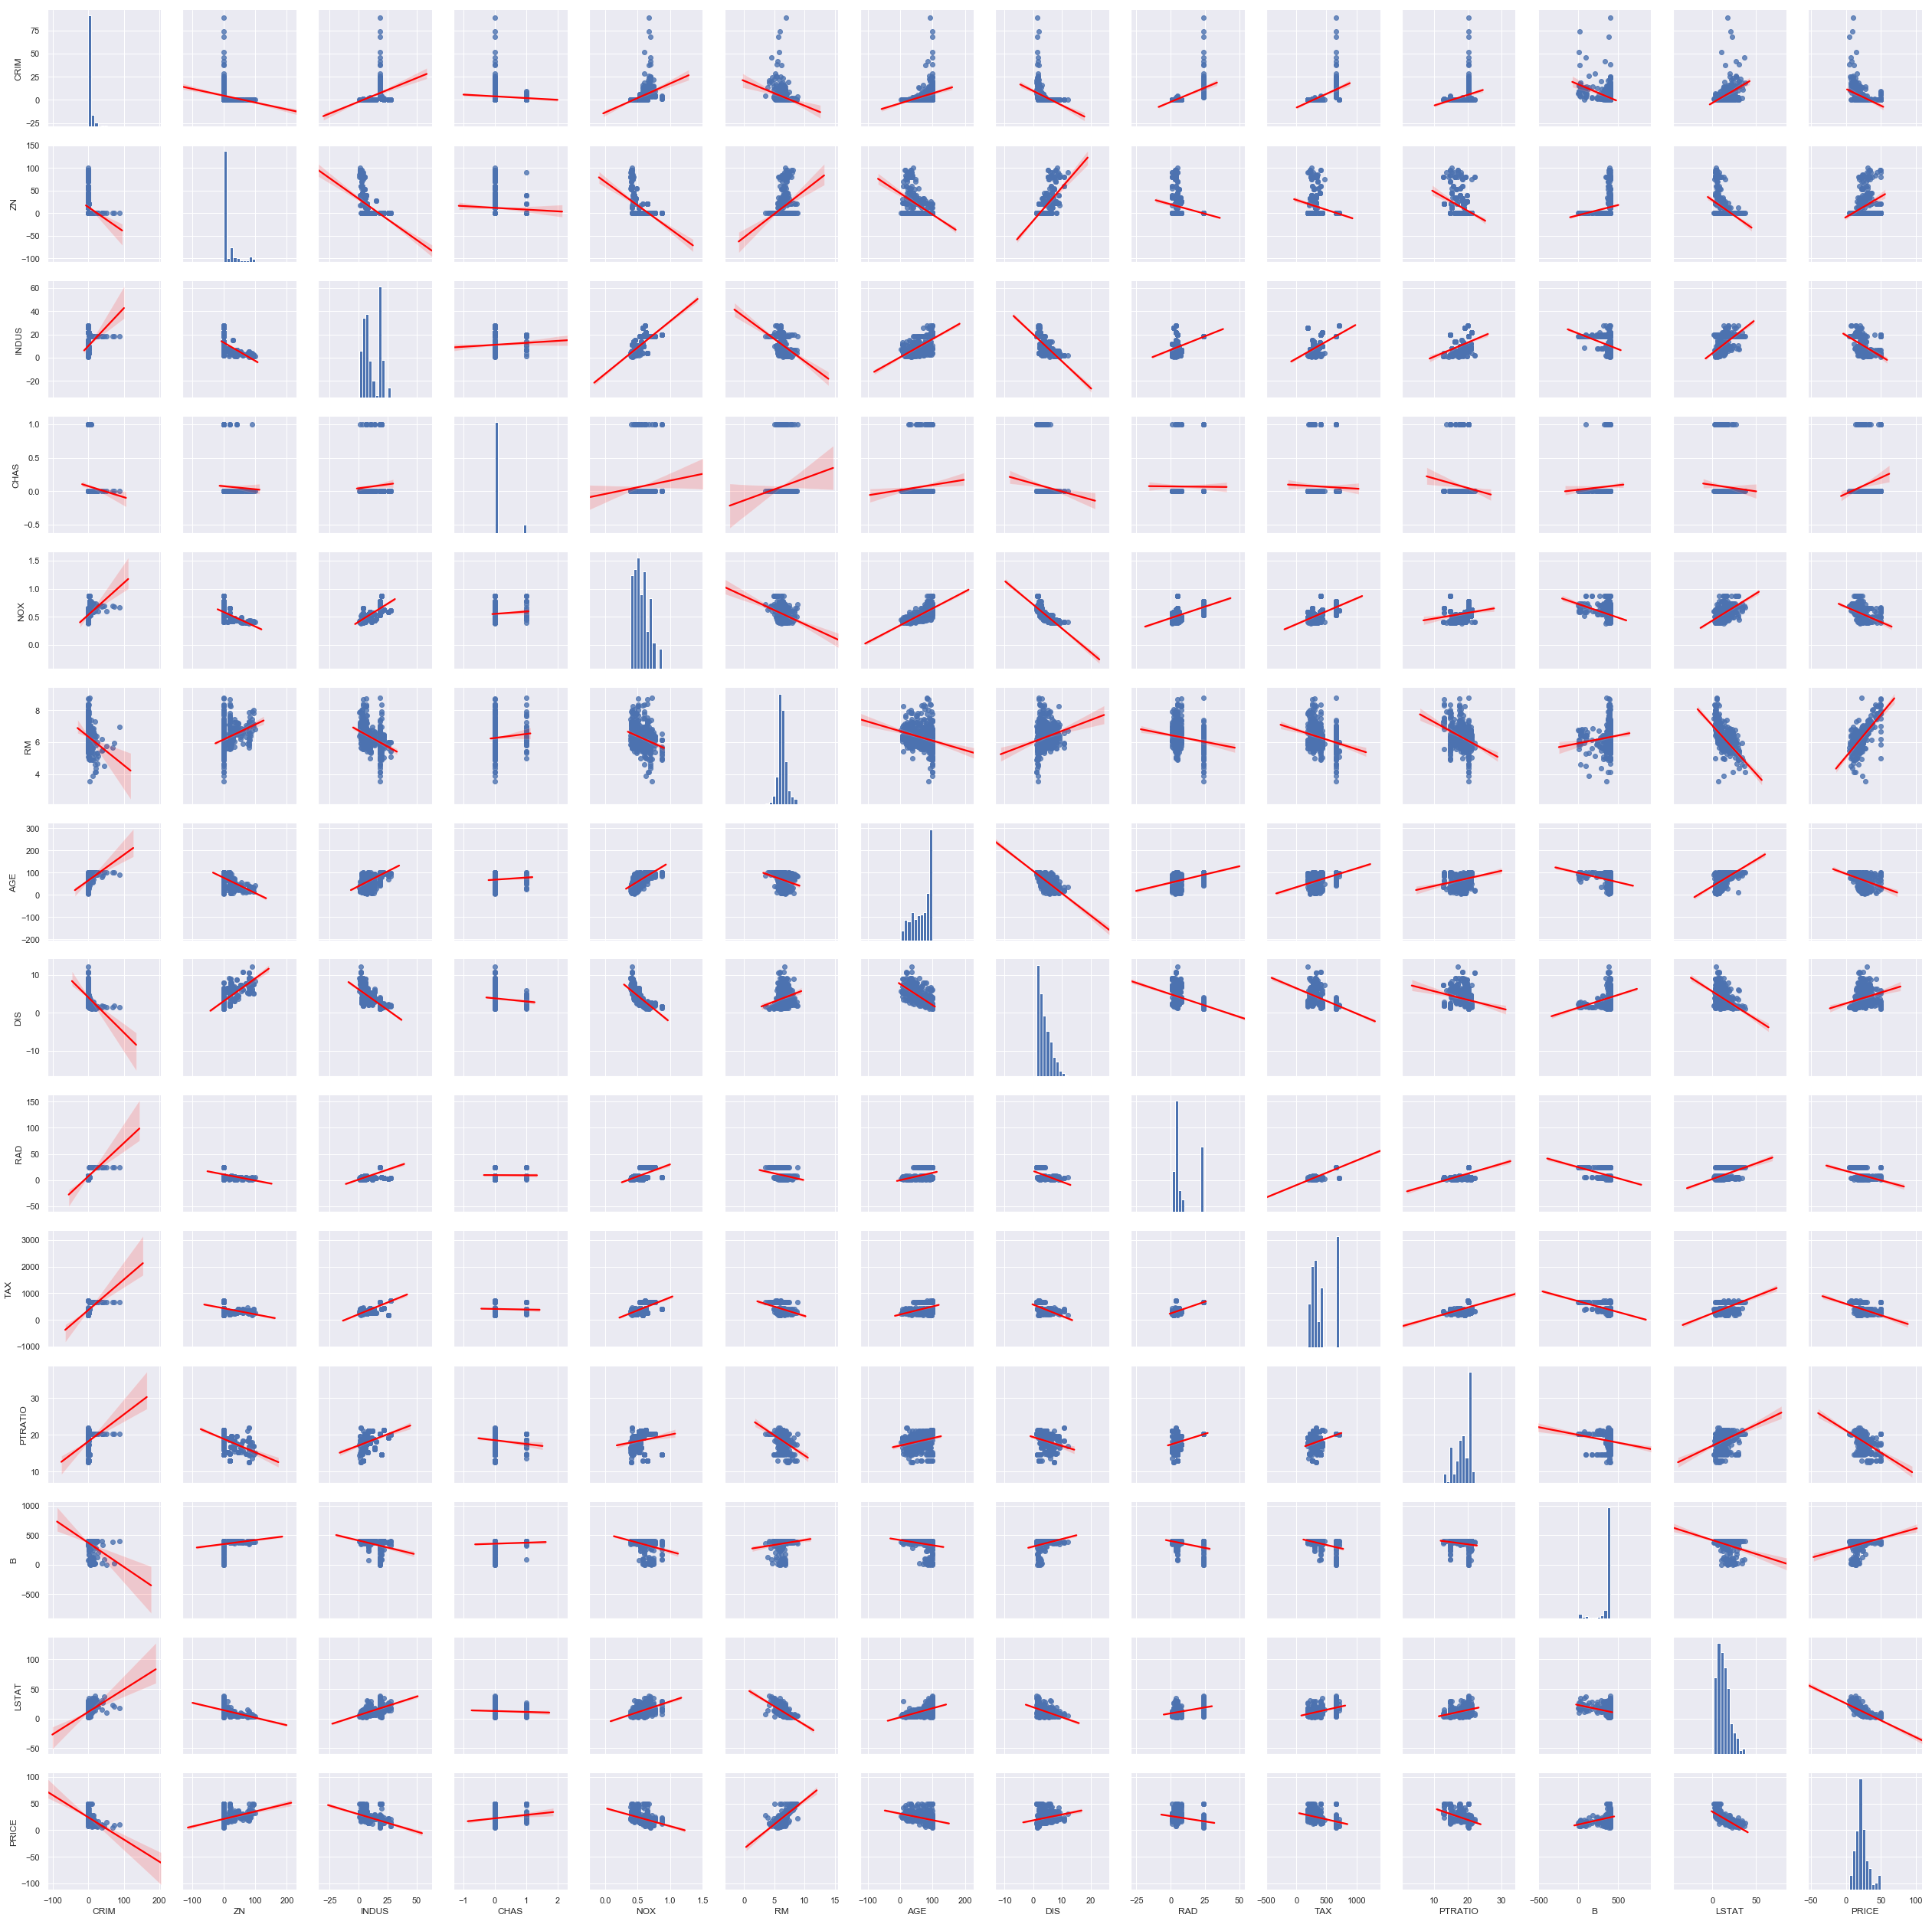

Wall time: 39.2 s


In [43]:
%%time
sns.pairplot(data, kind='reg', plot_kws ={'line_kws':{'color':'red'}})
plt.show()

# Training & Test Dataset Split

In [44]:
prices = data['PRICE']
features = data.drop('PRICE', axis =1)

X_train, X_test, y_train, y_test = train_test_split(features, prices, test_size=0.2, random_state=10)


# % of training set
len(X_train)/len(features)


0.7984189723320159

In [45]:
# % of test dataset
X_test.shape[0]/features.shape[0]

0.2015810276679842

## Multivariable Regression

In [ ]:
regr = LinearRegression()
regr.fit(X_train, y_train)

#challenge: print out the r-squared for training and test datasets
print('Training data r-sqared:', regr.score(X_train, y_train))
print('Test data r-sqared:', regr.score(X_test, y_test))

print('Intercept', regr.intercept_)
pd.DataFrame(data=regr.coef_, index =X_train.columns, columns=['coef'])

## Data Transformations

In [ ]:
data['PRICE'].skew()

In [ ]:
y_log = np.log(data['PRICE'])

y_log.tail()

In [ ]:
y_log.skew()

In [ ]:
sns.distplot(y_log)
plt.title(f'Log price with skew {y_log.skew()}')
plt.show()

In [ ]:
sns.lmplot(x='LSTAT', y='PRICE', data=data, height = 7, scatter_kws={'alpha':0.6}, line_kws={'color': 'red'})
plt.show()

In [ ]:
transformed_data = features
transformed_data['LOG_PRICE'] = y_log

sns.lmplot(x='LSTAT', y='LOG_PRICE', data=transformed_data, height = 7, scatter_kws={'alpha':0.6}, line_kws={'color': 'teal'})
plt.show()

## Regression Using Log Prices

In [ ]:
prices = np.log(data['PRICE']) # using log prices now.
features = data.drop('PRICE', axis =1)

X_train, X_test, y_train, y_test = train_test_split(features, prices, test_size=0.2, random_state=10)

regr = LinearRegression()
regr.fit(X_train, y_train)

print('Training data r-sqared:', regr.score(X_train, y_train))
print('Test data r-sqared:', regr.score(X_test, y_test))

print('Intercept', regr.intercept_)
pd.DataFrame(data=regr.coef_, index =X_train.columns, columns=['coef'])

In [ ]:
# Charles river property prenium

np.e**0.080331

## p values and Evaluating Coefficients

In [ ]:
X_incl_const = sm.add_constant(X_train)

## OLS (Ordinary Least Squares)
model = sm.OLS(y_train, X_incl_const)
results = model.fit()

#results.params
#results.pvalues
pd.DataFrame({'coef': results.params, 'p-value':results.pvalues})